Text(0.5, 1.0, 'Campo de direcciones')

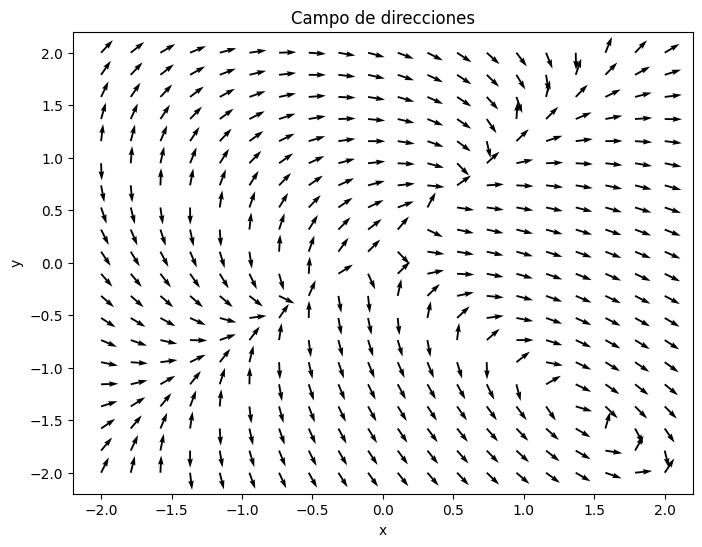

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

def f(x, y):
    num = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    den = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    return num/den

x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = 1
V = f(X, Y)
V_norm = np.sqrt(U**2 + V**2)
U2, V2 = U/V_norm, V/V_norm

plt.figure(figsize=(8,6))
plt.quiver(X, Y, U2, V2, angles="xy")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo de direcciones")

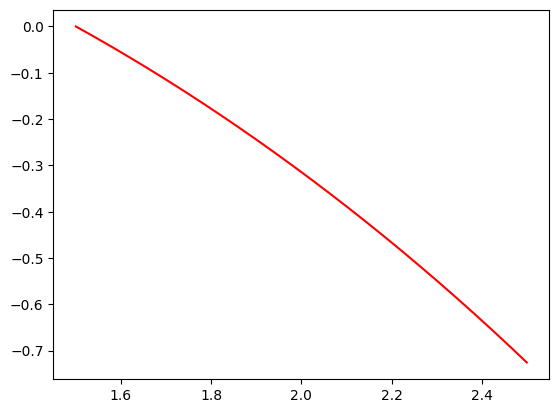

In [ ]:
def ode(x, y):
    return f(x, y[0])

sol = solve_ivp(ode, [1.5, 2.5], [0], t_eval=np.linspace(1.5, 2.5, 200))
plt.plot(sol.t, sol.y[0], "r", label="Solución PVI y(1.5)=0")


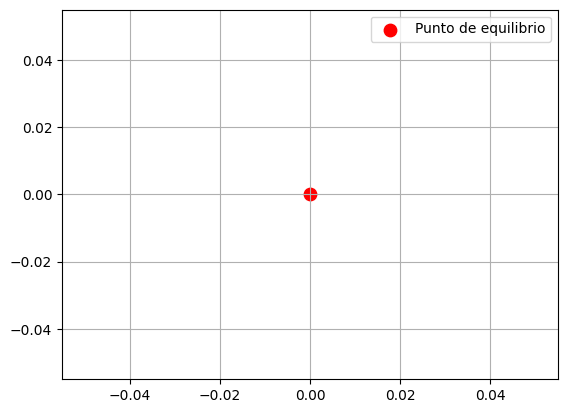

Punto de equilibrio aproximado: [0. 0.]


In [ ]:
def system(vars):
    x, y = vars
    eq1 = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    eq2 = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    return [eq1, eq2]

sol_eq = fsolve(system, [0,0])
plt.scatter(sol_eq[0], sol_eq[1], color="red", s=80, label="Punto de equilibrio")

plt.legend()
plt.grid(True)
plt.show()

print("Punto de equilibrio aproximado:", sol_eq)